In [55]:
# ваши импорты
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy import stats as st
import numpy as np

### Задача 1.

В револьвере вставлены два патрона подряд. Первый участник русской рулетки после выстрела остался жив. Что следует сделать второму участнику: случайно прокрутить барабан перед выстрелом или выстрелить сразу?

В рамках решения этой задачи мы будем сравнивать 2 вероятности:
- остаться в живых, если произвольно покрутил барабан
- остаться в живых, если выстрелил сразу после первого участника

Рассчитаем первую.  
После выстрела в барабане с шестью ячейками все еще два патрона. Второй участник произвольно крутит барабан. Какова вероятность, что он останется в живых после выстрела? Рассчитайте вероятность, обозначьте ее p_1 и выведите значение этой переменной на экран.

In [2]:
p_1 = 4/6
print(p_1)

0.6666666666666666


Чтобы рассчитать вероятность второго события, сформируем множество всех элементарных исходов, обозначая 0 ячейки без пуль и X ячейки с пулями:

- X 0 0 0 0 X
- 0 0 0 0 X X
- 0 0 0 X X 0
- 0 0 X X 0 0
- 0 X X 0 0 0
- X X 0 0 0 0

Два из этих исходов невозможны с учетом, что один игрок уже выстрелил и остался в живых. Посчитайте количество оставшихся исходов, а также количество таких, при которых второй игрок выжевет. Рассчитайте итоговую вероятность выжить для второго игрока, если он не будет крутить барабан после первого, запишите ее в переменную p_2 и выведите ее значение на экран.

In [5]:
p_2 = 3/4
print(p_2)

0.75


Сравните полученные вероятности и скажите, что лучше сделать второму игроку, чтобы выжить.

In [8]:
if(p_1>p_2):
    print("Второму игроку лучше крутить барабан")
elif(p_2>p_1):
    print("Второму игроку лучше стрелять и не крутить")

Второму игроку лучше стрелять и не крутить


### Задача 2. 

Вася пришел на автобусную остановку, чтобы поехать в гости к бабушке в деревню. Он знает, что вероятность того, что автобус приедет за 30 минут, составляет 95%. Но он решил столько не ждать, а вызвать такси, если автобус не приедет в течение пятнадцати минут. Какова вероятность, что Вася не поедет к бабушке на такси?

Сначала давайте ответим на вопрос: какова вероятность того, что автобус НЕ приедет в течение 30 минут? Это событие является противоположным к событию "автобус приедет в течение 30 минут". Посчитайте эту вероятность и запишите в переменную p_1, а затем выведите ее значение на экран.

In [15]:
p_1=round(1-0.95,2)
print(p_1)

0.05


Теперь давайте порассуждаем. Чтобы случилось событие "автобус не приедет в течение тридати минут", должно произойти два события:
- автобус не приезжает первые 15 минут
- автобус не приезжает вторые 15 минут

Все эти события независимы, то есть вероятность того, что случатся они все, равна произведению их вероятностей. Также их все можно переформулировать в "автобус не приедет в течение 15 минут". Обозначьте эту вероятность p_2, рассчитайте и выведите на экран.

In [30]:
p_2 = p_1**0.5
print(p_2)

0.22360679774997896


Мы знаем вероятность того, что автобус не приедет в течение 15 минут. Но нам нужна вероятность того, что Вася все таки поедет к бабушке на автобусе. Рассчитайте ее, запишите в переменную p_3 и выведите ее значение на экран.

In [31]:
p_3 = round(1-p_2,3)
print(p_3)

0.776


### Задача 3.

С помощью [данных](https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset) о весе людей в возрасте 18 лет ответьте на два вопроса:
- у какой доли людей в этом возрасте вес не превышает 50кг?
- какого веса не имеет 70 процентов людей?

In [38]:
# считываем данные, переводим вес в килограммы и оставляем только нужный столбец
data=pd.read_csv('C:/Users/molot/Downloads/archive/SOCR-HeightWeight.csv')
# ваш код с загрузкой и предобработкой данных
data['Weight(kg)']=data['Weight(Pounds)']*0.4536

<Axes: >

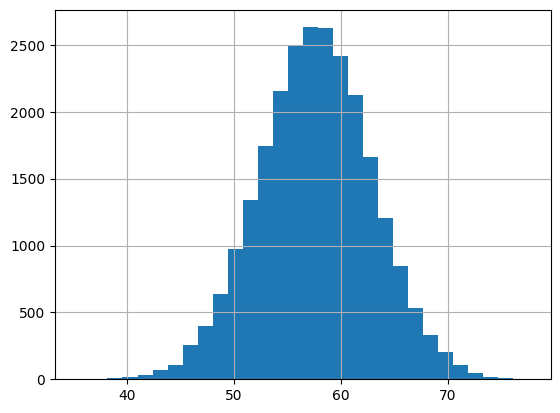

In [43]:
# убедимся, что вес имеет нормальное распраделение
data['Weight(kg)'].hist(bins=30)
# ваш код c гистограммой

<Axes: >

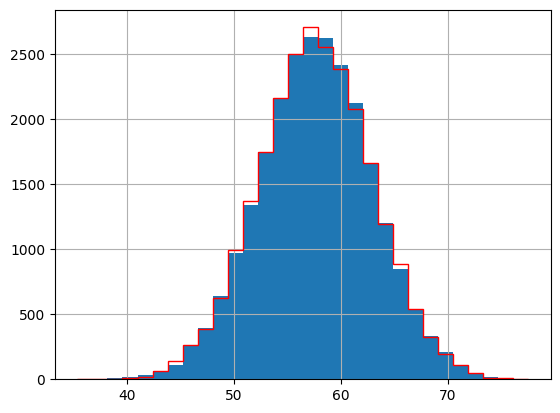

In [52]:
# определяем параметры нормального распределения по имеющейся выборке и визуализируем полученное распределение, чтобы убедиться, что мы все подобрали корректно
weights=[]
mean_weights=data['Weight(kg)'].mean()
sign_weights=data['Weight(kg)'].std()
for i in range(data.shape[0]):
    weights.append(random.normalvariate(mu=mean_weights, sigma=sign_weights))
weights=pd.Series(weights)
# ваш код с определением параметров рапределения и его инициализацией
weight_range=[data['Weight(kg)'].min(), data['Weight(kg)'].max()]
data['Weight(kg)'].hist(bins=30, range=weight_range)
weights.hist(bins=30, histtype='step', color='red', range=weight_range)
# ваш код с визуализацией, подтверждующей соответствие распределения исходным данным

Вероятность того, что вес не превышает 50кг?

In [59]:
# ваш код
weight_distr=st.norm(mean_weights, sign_weights)
weight_distr.cdf(50)

0.07422716893518833

Какого веса не имеет 70% людей?

In [60]:
# ваш код
weight_distr.ppf(1-0.7)

54.86947021071381